*** This notebook has two parts: ***
    
*** 1) a VERY long explanation of Gibss sampling ***
   
*** 2) Implementation of the Gibbs sampling for a linear model! ***


*** PART 1 ***

Using the idea of Markov Chain and the fact that Markov chain will converge to a steady state. We can build a Monte Carlo process for sampling from a distribuition. Here, we talk about the Gibbs sampling method aa is one of the (Markov Chain Monte Carlo) MCMC methods. 
We assume we have a distribution of form $P(x_{1}, x_{2}, x_{3})$. Steps we take are listed below, 

1) Start with initial values ($x_{1}^{0}, x_{2}^{0}, x_{3}^{0}$)

2) At each iteration we update one dimention at a time:


$x_{1}^{1} \longrightarrow P(x_{1}| x_{2}^{0}, x_{3}^{0})$

$x_{2}^{1} \longrightarrow P(x_{2}| x_{1}^{1}, x_{3}^{0})$

$x_{3}^{1} \longrightarrow P(x_{3}| x_{1}^{1}, x_{2}^{1})$



3) Repeat for $k = 1 ... n$ times so we get: 


$x_{1}^{k+1} \longrightarrow P(x_{1}| x_{2}^{k}, x_{3}^{k})$
$x_{2}^{k+1} \longrightarrow P(x_{2}| x_{1}^{k+1}, x_{3}^{k})$
$x_{3}^{k+1} \longrightarrow P(x_{3}| x_{1}^{k+1}, x_{2}^{k+1})$


So, each step depends on the previus steps and cannot be done in parallel. 

But, why Gibss sampling work? Here is a short proof:

So the idea is that we want to implement the markov chain property that (under some loose conditions) the chain will converge to a steady state. We assume that the distribution we want to sample from is a steady state of a markov chain. And we introduce $q(x,y,z)$ as a transition matrix. So, for Gibss sampling we want to prove : 

$p(x',y',z') = \sum_{x,y,z} q(x,y,z \rightarrow x',y',z') p(x,y,z)$ 

$q(x,y,z)$ is a conditional probabilty (following Gibss rules), so we can rewrite the bove equation as follows:

$\sum_{x,y,z} q(x,y,z \rightarrow x',y',z') p(x,y,z) = \sum_{x,y,z} p(x'|y= y, z=z) p(y'|x= x', z=z) p(z'|x= x', y=y') p(x,y,z)$

The equation can be simplified by bringing the $p(z'|x',y')$ term out of summation as it does not depond on x, y, z any more. 

$\sum_{x,y,z} p(x'|y= y, z=z) p(y'|x= x', z=z) p(z'|x= x', y=y') p(x,y,z) = p(z'|x',y')\sum_{x,y,z} p(x'|y, z) p(y'|x', z)  p(x,y,z) $

As, $p(x'|y, z) p(y'|x', z)$ dont depend on x we can simplify the summation even more:

$p(z'|x',y') \sum_{x,y,z} p(x'|y, z) p(y'|x', z) p(x,y,z) = p(z'|x',y') \left(\sum_{y,z} p(x'|y, z) p(y'|x', z)\sum_{x}p(x,y,z)\right)$

$\sum_{x}p(x,y,z)$ is the margenalization for $x$ and can be written as:

$\sum_{x}p(x,y,z) = p(y,z)$

So the euqation will be more simplified as:

$ p(z'|x',y') \left(\sum_{y,z} p(x'|y, z) p(y'|x', z)\sum_{x}p(x,y,z)\right) = p(z'|x',y') \sum_{y,z} p(x'|y, z) p(y'|x', z) p(y,z)$

Here:

$\sum_{y,z} p(x'|y,z)p(y,z) = \sum_{y,z} p(x',y,z) = \sum_{z} p(x',z)$

So the equation can be simplified as:

$p(z'|x',y') \sum_{y,z} p(x'|y, z) p(y'|x', z) p(y,z) = p(z'|x',y')\sum_{z} p(y'|x', z) p(x',z)$

With the same logic:

$p(z'|x',y')\sum_{z} p(y'|x', z) p(x',z) = p(z'|x',y')p(y',x') = p(x',y',z')$

So we can see that:

$p(x',y',z') = \sum_{x,y,z} q(x,y,z \rightarrow x',y',z') p(x,y,z)$


Now knowing that Gibss sampling works we can have an example:

We are looking at the linear regression problem in which we know x (input) and y (output) and we want to find slope and intercept. 

We have set of $(x_{i},y_{i})$ and we know : 
$y_{i} = \beta_{1} x_{i} + \beta_{0}$
We want to find $\beta_{1}$ and $\beta_{0}$. We assume that the two parameters are following normal distribution and $y_{i}$ is following the normal distribution as well such that:

($y_{i}|x_{i}, \beta_{0}, \beta_{1}, \frac{1}{\tau}) \rightarrow N(\beta_{0}+\beta_{1} x_{i}, \frac{1}{\tau})$

$\beta_{0} \rightarrow N(\mu_{0}, \frac{1}{\tau_{0}})$

$\beta_{1} \rightarrow N(\mu_{1}, \frac{1}{\tau_{1}})$

 ***So, the posteriori for $\beta_{0}$ can be calculates as follows:***


1) the log dependence is written as:

$-\tau/2 \sum_{i}(y_{i}-\beta_{0}+\beta_{1} x_{i})^2 - \tau_{0}/2(\beta_{0} - \mu_{0})^2$

where the first term is likelihood from the observations and the second term is the apriori term. 

2) We rearrange the equation to be solved for $\beta_{0}$:

$-\frac{\tau}{2} \sum_{i}(y_{i}-\beta_{0}+\beta_{1} x_{i})^2 - \frac{\tau_0}{2}(\beta_{0} - \mu_{0})^2 = 
-\frac{\tau}{2} \sum_{i} \left ((y_{i}-\beta_{1} x_{i})^2 -2(y_{i}-\beta_{1}x_{i})\beta_0\right) + \beta_{0}^2 - \frac{\tau_0}{2} (\beta_0^2 - 2\mu_0 \beta_0 + \beta_0^2)$

3) Delet all terms which are not dependent to $\beta_0$:

$-\frac{\tau}{2} \sum_{i} \left ((y_{i}-\beta_{1} x_{i})^2 -2(y_{i}-\beta_{1}x_{i})\beta_0\right) + \beta_{0}^2 - \frac{\tau_0}{2} (\beta_0^2 - 2\mu_0 \beta_0 + \beta_0^2) = \tau \sum_{i} \left((y_{i}-\beta_{1}x_{i})\beta_0 \right) - \frac{\tau}{2} N\beta_0^2 + \tau_0 \mu_0 \beta_0 + \frac{\tau_0}{2} \beta_0^2 $

4) As the expression is a quadratic function of {\beta_0} the conditional sampling for $\beta_0$ will be normal:

$(\beta_{0}|x_{i}, y_{i}, \beta_{1}, \tau, \tau_1, \tau_0) \rightarrow N(\frac{\tau_0\mu_0 + \tau \sum_{i}(y_i - \beta_1 x_i)}{\tau_0 + N \tau},\frac{1}{\tau_0 + N \tau} )$

And we just need to sample from this last expression

*** Similarly the posterior for $\beta_1$ can be calculated ***:

1) $\frac{-\tau}{2}\sum_{i} (y_i - \beta_0 -\beta_1 x_i)^2 - \frac{-\tau_1}{2} (\beta_1 - \mu_1)^2 = 
\frac{-\tau}{2} \sum_{i} \left((y_i-\beta_0)^2 + (\beta_1 x_i)^2 - 2 \beta_1 x_i(y_i - \beta_0) \right) - \frac{-\tau_1}{2} \beta_1^2 + \tau_1 \mu_1 \beta_1 - \frac{-\tau_1}{2} \mu_1^2 $

2) We only take the terms which depend on $\beta_1$ and simplify the equation as follows:

$\frac{-\tau}{2} \sum_i \beta_1^2 x_i^2 + \tau \sum_i (y_i - \beta_0) x_i \beta_1 - \frac{-\tau_1}{2} \beta_1^2 + \tau_1 \mu_1 \beta_1$

3) So we can see the normal form with respect for $\beta_1$ now:

$\beta_1 | \beta_0 , \tau, \tau_1,\mu_1, x, y = N \left( \frac{\tau_1\mu_1 + \tau \sum (y_i - \beta_0) x_i}{\tau_1 + tau \sum x_i^2}, \frac{1}{\tau_1 + \tau \sum_i x_i^2}\right)$







*** PART 2 ***

In [1]:
import numpy as np

In [2]:
def make_fake_data():
        beta_0_true = 2
        beta_1_true = -1
        tau_true = 2.3
        x = np.random.uniform(0,5,100)
        y = np.random.normal(beta_0_true + beta_1_true * x, 1 / np.sqrt(tau_true))
        
        return x,y


In [3]:
def sampler_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    
    mean_beta_0 = (tau_0 * mu_0 + tau * np.sum(y - beta_1 * x))/(tau_0 + tau * len(x))
    p_beta_0 = tau_0 + tau * len(x)
    beta_0_sample = np.random.normal(mean_beta_0, 1 / np.sqrt(p_beta_0))
    
    return beta_0_sample

In [4]:
def sampler_beta_1(y, x, beta_0, tau, mu_1, tau_1):
   
    
    mean_beta_1 = (tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x))/ (tau_1 + tau * np.sum(x * x))
    p_beta_1 = tau_1 + tau * np.sum(x * x)
    beta_1_sample = np.random.normal(mean_beta_1, 1 / np.sqrt(p_beta_1 ))
    
    return  beta_1_sample

In [30]:
def linear_gibbs_sampling():
    x, y = make_fake_data()
    beta_0 = 0
    beta_1 = 0
    mu_0 = 1
    mu_1 = 1
    tau_0 = 1
    tau = 2
    tau_1 = 1
    iteration = 1500
    beta_0_list = []
    beta_1_list = []
    for i in range(iteration):
        beta_0 = sampler_beta_0(y, x, beta_1, tau, mu_0, tau_0)
        beta_1 = sampler_beta_1(y, x, beta_0, tau, mu_1, tau_1)
        beta_0_list.append(beta_0)
        beta_1_list.append(beta_1)
        

        
    return beta_0_list, beta_1_list

In [31]:
beta_0_list, beta_1_list = linear_gibbs_sampling()

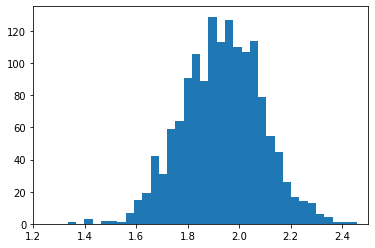

In [32]:
import matplotlib.pyplot as plt
plt.hist(beta_0_list, bins = 100)
plt.xlim(1.2, 2.5)
plt.show()

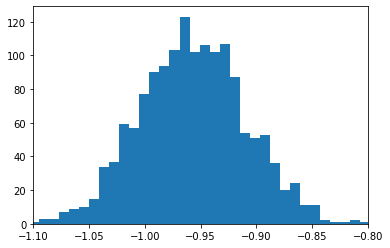

In [33]:
plt.hist(beta_1_list, bins = 100)
plt.xlim(-1.1, -.8)
plt.show()


In [34]:
print('the mean for beta_1 is:',np.mean(beta_1_list))
print('the mean for beta_0 is:',np.mean(beta_0_list))
print('the standard deviation for beta_1 is:',np.std(beta_1_list))
print('the standard deviation for beta_0 is:',np.std(beta_0_list))

the mean for beta_1 is: -0.955333344033549
the mean for beta_0 is: 1.9277667877225486
the standard deviation for beta_1 is: 0.05585218838157741
the standard deviation for beta_0 is: 0.1866843738346787
